In [1]:
import numpy as np

from commons import *
from dataset_loader import load_images, prepare_dataset
from IPython.display import display
import cv2
import pickle
import matplotlib.pyplot as plt
from keras.models import load_model


DOTS_SRC = 'hit-images-final3/dot'
TRACKS_SRC = 'hit-images-final3/line'
WORMS_SRC = 'hit-images-final3/worms'
ARTIFACTS_SRC = 'hit-images-final2/artefact'

DOTS_AC = 'cache/dots_100000_1vs7.h5'
TRACKS_AC = 'cache/tracks_100000_1vs7.h5'
WORMS_AC = 'cache/worms_100000_1vs7.h5'
ARTIFACTS_AC = 'cache/artifacts_100000_1vs7.h5'


# TODO: trzy klasy do kupy, wyznaczyć threshold. Pamiętać, że teraz liczność będzie 1:3, a nie 1:1
#       i wtedy sprawdzić jak ten próg odróżnia klasy
# TODO: przetestować metrykę samą w sobie dla dwóch obrazków
# TODO: zastosować metrykę KL z VAE w tym kodzie


dots_set =  prepare_dataset(load_images(DOTS_SRC))
worms_set =  prepare_dataset(load_images(WORMS_SRC))
tracks_set =  prepare_dataset(load_images(TRACKS_SRC))
artifacts_set =  prepare_dataset(load_images(ARTIFACTS_SRC))

dots_autoencoder = load_model(DOTS_AC)
worms_autoencoder = load_model(WORMS_AC)
tracks_autoencoder = load_model(TRACKS_AC)
artifacts_autoencoder = load_model(ARTIFACTS_AC)

on = {'dots': calc_similarity(dots_autoencoder, dots_set, tracks_set, worms_set, artifacts_set),
      'worms': calc_similarity(worms_autoencoder, dots_set, tracks_set, worms_set, artifacts_set),
      'tracks': calc_similarity(tracks_autoencoder, dots_set, tracks_set, worms_set, artifacts_set),
      'artifacts': calc_similarity(artifacts_autoencoder, dots_set, tracks_set, worms_set, artifacts_set)}

Channel dots, compare dots vs tracks, threshold: -9.80135123405955, fp/fn percent: 14.095708213355271 %


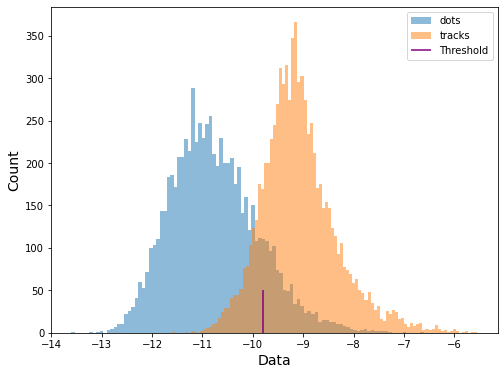

Channel dots, compare dots vs worms, threshold: -9.535445596327701, fp/fn percent: 8.58957701746788 %


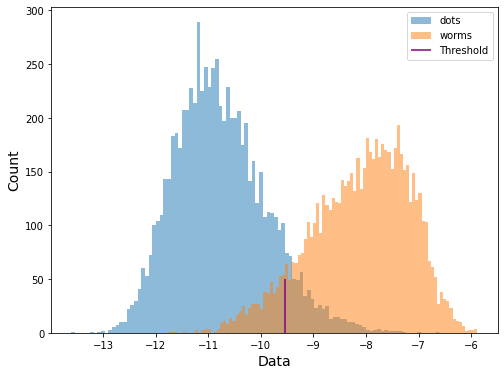

Channel dots, compare dots vs artifacts, threshold: -8.894596381089073, fp/fn percent: 2.786377708978328 %


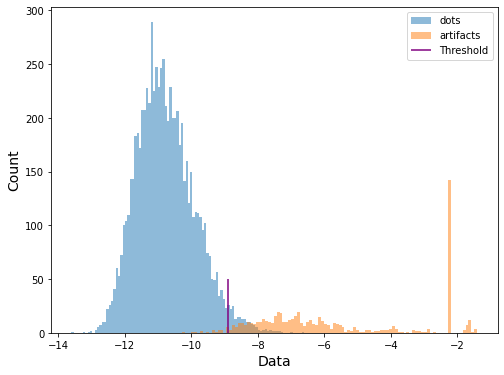

Channel tracks, compare tracks vs dots, threshold: -9.260135606744946, fp/fn percent: 2.0910462086932675 %


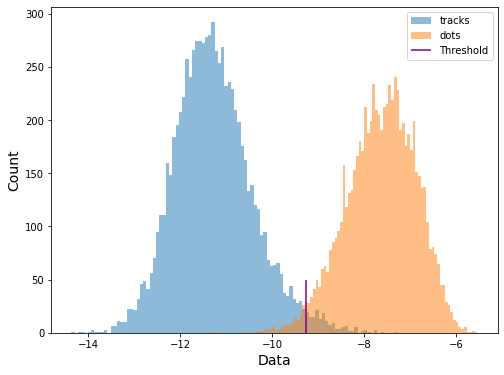

Channel tracks, compare tracks vs worms, threshold: -9.03609127629082, fp/fn percent: 1.3714450700158798 %


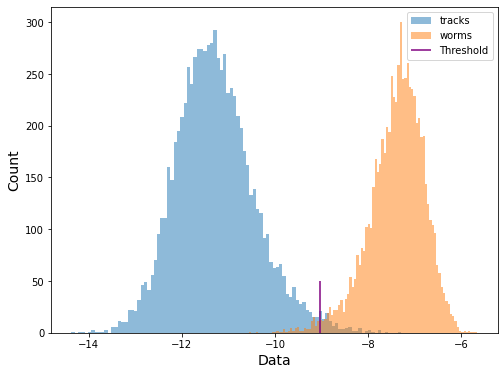

Channel tracks, compare tracks vs artifacts, threshold: -9.122474749553358, fp/fn percent: 1.780185758513932 %


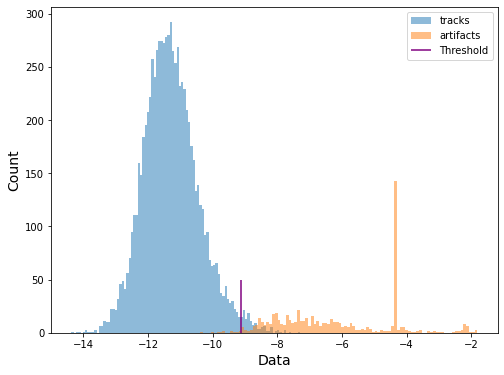

Channel worms, compare worms vs dots, threshold: -9.290767158559593, fp/fn percent: 25.48722390645301 %


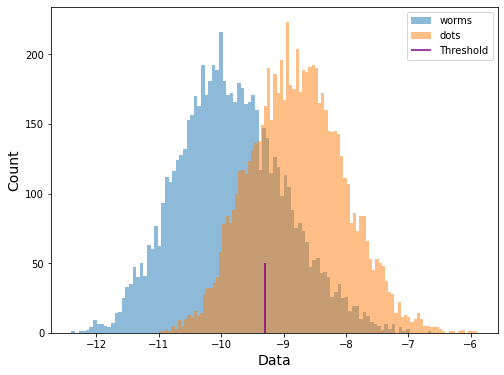

Channel worms, compare worms vs tracks, threshold: -9.23835777405968, fp/fn percent: 23.588855204273134 %


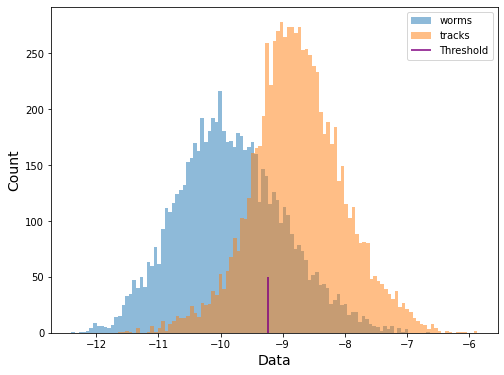

Channel worms, compare worms vs artifacts, threshold: -8.39660391659883, fp/fn percent: 5.65015479876161 %


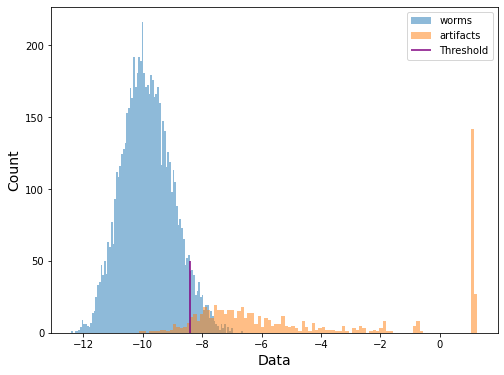

Channel artifacts, compare artifacts vs dots, threshold: -6.875927734288933, fp/fn percent: 42.87925696594427 %


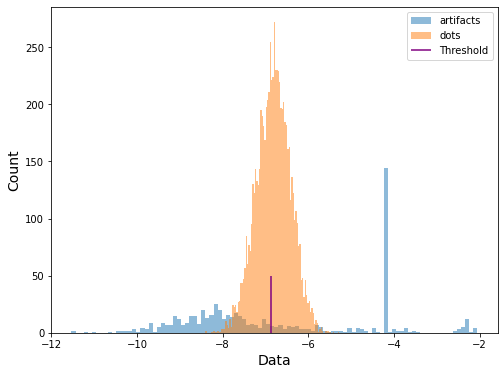

Channel artifacts, compare artifacts vs tracks, threshold: -7.373230459003966, fp/fn percent: 49.14860681114551 %


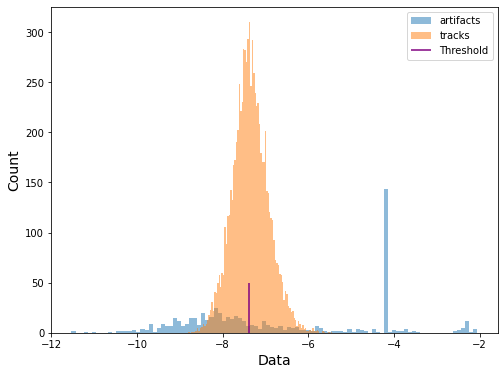

Channel artifacts, compare artifacts vs worms, threshold: -7.100654813521741, fp/fn percent: 46.13003095975232 %


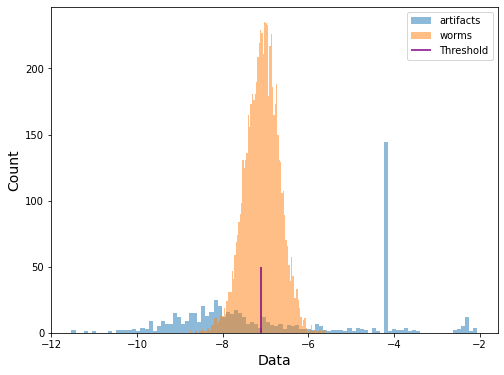

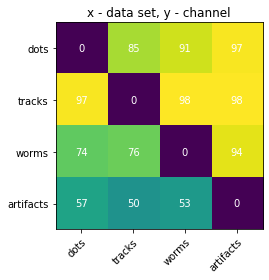

In [2]:
confusion_matrix(on)